![tinhatben](tinhatben_svg.png)

# Principal Component Analysis

This Jupyter notebook has been written to partner with the [Principal components blog post](https://tinhatben.com/2016/04/13/principal-component-analysis/)

Copyright (c) 2016, tinhatben
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of tinhatben nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------
# Components of PCA

## Mean

In this example we will show an implementation of an equation to calculate the mean, as well as using Python and numpy's interal functions.  We recall from the blog post:

$$ \large{\mu = \frac{1}{n}\sum_{k=1}^n x_k }$$

The numpy documentation for numpy.mean can be found [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)


In [2]:
# Calculating the mean by hand on some very simple data
very_basic_data = np.array([1,2,3,4,5])
very_basic_data_2d = np.array([[1,2,3,4,5],[6,7,8,9,10]])

print("Very basic data: %s" % very_basic_data.__str__())
print("Very basic data 2D:\n %s\n" % very_basic_data_2d.__str__())

n = very_basic_data.shape[0]
n_2d = very_basic_data_2d.shape[1]

mu = (np.sum(very_basic_data)) / n

mu_2d = (np.sum(very_basic_data_2d, axis=1)) / n_2d

print("----Calculating By Hand----")

print("\nThe mean of very_basic data is : %0.2f" % mu )
print("The mean of very_basic data - 2D is : %0.2f and %0.2f\n" % (mu_2d[0], mu_2d[1]) )

print("----Calculating Using NumPy----")

# Calculating using numpy

mu = np.mean(very_basic_data)
mu_2d = np.mean(very_basic_data_2d, axis=1)
print("\nThe mean of very_basic data is (calculated using NumPy): %0.2f" % mu )


Very basic data: [1 2 3 4 5]
Very basic data 2D:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]

----Calculating By Hand----

The mean of very_basic data is : 3.00
The mean of very_basic data - 2D is : 3.00 and 8.00

----Calculating Using NumPy----

The mean of very_basic data is (calculated using NumPy): 3.00


# Standard Deviation
Recall that he standard deviation is:

$$ \large{\sigma = \sqrt{\frac{\sum_{k=1}^n (x_k - \mu)^2}{n - 1}}}$$

The numpy documentation to the standard deviation  (numpy.std) can be found [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html)

In [3]:
# Add some noise to very_basic_data to ensure 
from random import randint

very_basic_data *= randint(1,5)
very_basic_data_2d[0,:] *= randint(1,5)
very_basic_data_2d[1,:] *= randint(1,5)

mu = np.mean(very_basic_data)
mu_2d = np.mean(very_basic_data_2d, axis=1)

print("\n" + 10 *"----" + "1D Data" + 10*"----")

print("The very basic data set with some random noise: %s" % str(very_basic_data))
print("The new mean (mu) = %0.2f" % mu)

# Using the very basic data
sigma_squared = np.sum((very_basic_data - mu) ** 2) / (n - 1)

print("Variance (sigma^2) = %0.2f" % sigma_squared)

# Standard deviation

sigma = np.sqrt(sigma_squared)

print("Standard deviation (sigma) = %0.2f" % sigma)

# You can also calculate the standard deviation using numpy
sigma = np.std(very_basic_data, ddof = 1) # ddof = 1, is used to ensure the denominator used is n - 1, not n
print("Standard deviation using NumPy (sigma)  = %0.2f" % sigma)


print("\n" + 10 *"----" + "2D Data" + 10*"----")

print("The very basic data set (2D) with some random noise: %s" % str(very_basic_data_2d))
print("The new 2D mean (mu) = %0.2f and %0.2f" % (mu_2d[0], mu_2d[1]))

# Using the very basic data

sigma_squared_2d = np.zeros(2)
sigma_squared_2d[0] = np.sum((very_basic_data_2d[0,:] - mu_2d[0]) ** 2) / (n_2d - 1)
sigma_squared_2d[1] = np.sum((very_basic_data_2d[1,:] - mu_2d[1]) ** 2) / (n_2d - 1)

print("Variance (sigma^2) = %0.2f and %0.2f" % (sigma_squared_2d[0], sigma_squared_2d[1]))

# Standard deviation

sigma_2d = np.sqrt(sigma_squared_2d)

print("Standard deviation (sigma) = %0.2f and %0.2f" % (sigma_2d[0], sigma_2d[1]))

# You can also calculate the standard deviation using numpy
sigma_2d = np.std(very_basic_data_2d, ddof = 1, axis=1)

print("Standard deviation using NumPy (sigma)  = %0.2f and %0.2f" % (sigma_2d[0], sigma_2d[1]))

print("\n\n**Note: The variance calculated for the 2D data sets, considers each row or array as an independant data set")


----------------------------------------1D Data----------------------------------------
The very basic data set with some random noise: [ 5 10 15 20 25]
The new mean (mu) = 15.00
Variance (sigma^2) = 62.50
Standard deviation (sigma) = 7.91
Standard deviation using NumPy (sigma)  = 7.91

----------------------------------------2D Data----------------------------------------
The very basic data set (2D) with some random noise: [[ 4  8 12 16 20]
 [ 6  7  8  9 10]]
The new 2D mean (mu) = 12.00 and 8.00
Variance (sigma^2) = 40.00 and 2.50
Standard deviation (sigma) = 6.32 and 1.58
Standard deviation using NumPy (sigma)  = 6.32 and 1.58


**Note: The variance calculated for the 2D data sets, considers each row or array as an independant data set


# Covariance

The covariance of X and Y is defined as:

$$\large{cov(X,Y) = \frac{\sum_{k=1}^n(X_k - \mu_X)(Y_k - \mu_Y)}{n-1}}$$

At this point we will introduce a new fake data set.  This is a set of sample data I <i>made up</i>, the data consists of two columns and 10 rows.  The first column represents the number of coffees consumed and the second column represents pages of a PhD thesis written.

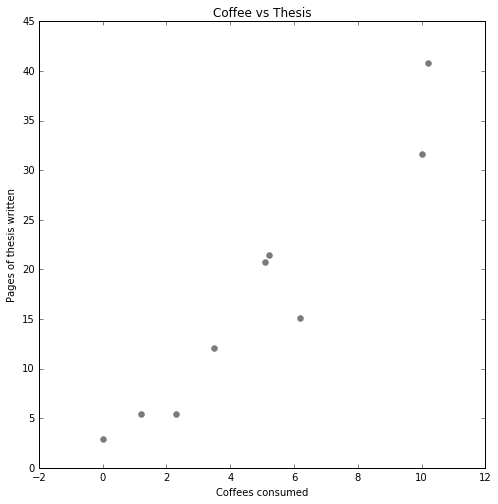

In [4]:
# Defining the data
coffee_v_thesis = np.array([
        [0, 2.94],
        [2.3, 5.45],
        [1.2, 5.41],
        [3.5, 12.10],
        [5.1, 20.75],
        [5.2, 21.48],
        [10, 31.60],
        [10.2, 40.84],
        [6.2, 15.12],
        ])

# Visualising the data
plt.figure(figsize=(8,8))
plt.scatter(x=coffee_v_thesis[:,0], y=coffee_v_thesis[:,1], color="#7a7a7a", s=30)
plt.ylabel("Pages of thesis written")
plt.xlabel("Coffees consumed")
plt.title("Coffee vs Thesis")


Where P is the number of pages written and C is the number of coffees consumed: computing 

$$\large{cov(P, C)}$$

The documentation for `numpy.cov` can be found [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)

In [5]:

C = coffee_v_thesis[:,0] # Select only the first column for coffee
P = coffee_v_thesis[:,1] # Second column for pages
n = coffee_v_thesis[:,0].shape[0] # Number of elements in the samples

mean_C = np.mean(C)
mean_P = np.mean(P)

cov_P_C = np.sum((C - mean_C) * (P - mean_P)) / (n - 1)

print ("cov(P,C) = %0.2f" % cov_P_C)

# Computing the covariance using numpy
# The first row, second element of the matrix corresponds to cov(P, C)
cov_P_C = np.cov(coffee_v_thesis[:,0], coffee_v_thesis[:,1])[0][1]  

print ("cov(P,C) (calculated using Numpy = %0.2f" % cov_P_C)

print("**Notice the positive covariance, more coffee = more thesis pages!")


cov(P,C) = 43.66
cov(P,C) (calculated using Numpy = 43.66
**Notice the positive covariance, more coffee = more thesis pages!


## Covariance matrix
$$\large{\overline{cov} =  \begin{bmatrix}
cov(X, X) & cov(X,Y) & cov(X,Z)\\ 
cov(Y, X) & cov(Y, Y) & cov(Y, Z)\\ 
cov(Z, X) & cov(Z, Y) & cov(Z, Z) 
\end{bmatrix}}$$

Computing the covariance matrix of `coffee_v_thesis`.  Notice the symmetry of the matrix

In [6]:
cov_P_C = np.cov(coffee_v_thesis[:,0], coffee_v_thesis[:,1])
print("The covariance matrix of coffee_v_thesis:\n%s" % cov_P_C.__str__())

The covariance matrix of coffee_v_thesis:
[[  12.79027778   43.65606944]
 [  43.65606944  163.47413611]]


## Eigenvalues and Eigenvectors

Calculate the eigenvalues and eigevectors of the covariance matrix `cov_P_C`

There are a couple of different ways of calculating the eigenvalues and eigenvectors.  The most straight-forward is to use `numpy.linalg.eig`. The documentation for numpy.linalg.eig can be found [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html#numpy.linalg.eig). 

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(cov_P_C)
print("eigenvalues: %s" % eigenvalues.__str__())
print("eigenvectors: \n%s" % eigenvectors.__str__())


eigenvalues: [   1.05604092  175.20837297]
eigenvectors: 
[[-0.96572297 -0.25957495]
 [ 0.25957495 -0.96572297]]


Another way of calculating the eigenvalues and eigenvectors is to use the singular value decomposition `numpy.linalg.svd` function within numpy (click [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) for the documentation).  One convenient difference compared to `numpy.linalg.eig` is that singular value decomposition returnes the eigenvalues in ascending order which is useful to PCA

The function `numpy.linalg.svd` takes a matrix `a` and returns two matrices `u` and `v` and an array of scalars `s` such that:

`u * np.diag(s) * v = a` 
$$ a  = U S V^T $$

Where `np.diag` computes the diagonal matrix of `s`.  

The eigenvalues of the matrix `a` can be calculated as a multiple of `S`.

The eigenvectors of the matrix `a` for the eigenvalues, correspond to the rows of `V` of the columns of `U`


In [8]:
U, S, V = np.linalg.svd(cov_P_C, full_matrices=False)

eigenvalues = S
eigevectors = U

# You can check the decomposition occurred correctly if the following statement returns True
print("Correct transform: ", np.allclose(cov_P_C, np.dot(U, np.dot(np.diag(S), V))))

print("eigenvalues: %s" % eigenvalues.__str__())
print("eigenvectors: \n%s" % eigenvectors.__str__())

('Correct transform: ', True)
eigenvalues: [ 175.20837297    1.05604092]
eigenvectors: 
[[-0.96572297 -0.25957495]
 [ 0.25957495 -0.96572297]]


-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------
# Executing PCA
## 1. Subtract the means

This ensures that the data is centered around the origin, looking at the graph below you can see the centre at (0,0)

Confirm the data is now centered about the mean: mu_x = -0.00, mu_y = 0.00


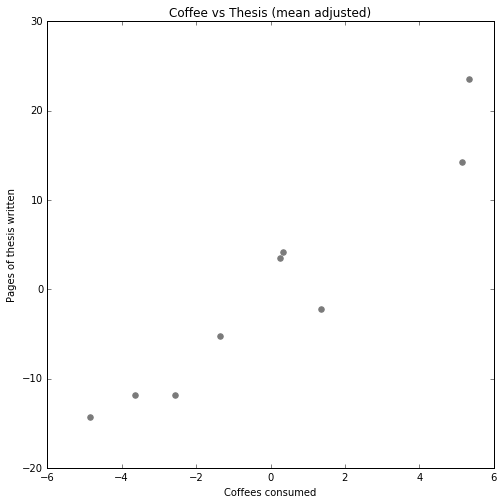

In [9]:
# Make a copy of the data
X = np.copy(coffee_v_thesis)
x_mean, y_mean = np.mean(X, axis=0)

X[:,0] -= x_mean
X[:,1] -= y_mean

x_mean, y_mean = np.mean(X, axis=0)

# Confirm the data is now centered about the mean i.e. the mean is close to 0
print("Confirm the data is now centered about the mean: mu_x = %0.2f, mu_y = %0.2f" % (x_mean, y_mean))

# Visualising the data
plt.figure(figsize=(8,8))
plt.scatter(x=X[:,0], y=X[:,1], color="#7a7a7a", s=30)
plt.ylabel("Pages of thesis written")
plt.xlabel("Coffees consumed")
plt.title("Coffee vs Thesis (mean adjusted)")

## 2. Calculate the Covariance Matrix
Calculate the covariance using the mean adjusted data

In [10]:
cov_P_C = np.cov(X[:,0], X[:,1])
print("Covariance of mean adjusted data\n%s" % cov_P_C.__str__())

Covariance of mean adjusted data
[[  12.79027778   43.65606944]
 [  43.65606944  163.47413611]]


## 3. Calculate the eigenvalues and eigenvectors
Calculate the eigenvalues and eigenvectors of the covariance matrix.  We will use the singular value decomposition `np.linalg.svd` function to ensure the eigenvalue are ordered from largest to smallest

In [11]:
U, S, V = np.linalg.svd(cov_P_C, full_matrices=False)

eigenvalues = S
eigevectors = U

# You can check the decomposition occurred correctly if the following statement returns True
print("Correct transform: %s" % str(np.allclose(cov_P_C, np.dot(U, np.dot(np.diag(S), V)))))

print("eigenvalues: %s" % eigenvalues.__str__())
print("eigenvectors: \n%s" % eigenvectors.__str__())

Correct transform: True
eigenvalues: [ 175.20837297    1.05604092]
eigenvectors: 
[[-0.96572297 -0.25957495]
 [ 0.25957495 -0.96572297]]


Determine the percentage of the variance represented by each eigenvalue

In [12]:
# Calculate the total variance
V_t = np.sum(eigenvalues)
print("Total variance V_t = %0.4f" % V_t)

# Determine the proportion
V_prop = eigenvalues / V_t
print("Proportion of variance V_prop = %s" % V_prop.__str__())

# Determine the proportion represented by the principal component
print("Proportion of variance represented by principal component %0.2f %%" % (V_prop[0] * 100))

Total variance V_t = 176.2644
Proportion of variance V_prop = [ 0.99400877  0.00599123]
Proportion of variance represented by principal component 99.40 %


We will choose to use eigenvalues an eigenvectors that represent 98% of variance.

$$\large{P \subset E \ni
P = E[..t]}$$

In this example it is only the principal component that provides sufficient variance.  One option for PCA is to select only the principal component as it represents the most variance for any single eigenvalue.

In [13]:
f_v = 0.99 # Proportion of total variation 98%

#Select only the components that account for 98% of the variance
cum_sum = np.cumsum(eigenvalues)
selected_eigenvalues = np.nonzero(cum_sum > (f_v * V_t))
print("Eigenvalue cumulative sum: %s" % cum_sum.__str__())
print("Cumulative sum  > f_v (%0.2f) = %s" % (f_v, selected_eigenvalues))

# Filter out the negligable components
t = filter(lambda x: x!=0, selected_eigenvalues[0])[0]
print("Number of selected eigenvalues = %d" % t)
print("Selected eignvalues = %s" % str(eigenvalues[0:t]))
# Assign the selected eigenvectors to P
P = eigenvectors[0:t]
print("P = %s" % P.__str__())

Eigenvalue cumulative sum: [ 175.20837297  176.26441389]
Cumulative sum  > f_v (0.99) = (array([0, 1]),)
Number of selected eigenvalues = 1
Selected eignvalues = [ 175.20837297]
P = [[-0.96572297 -0.25957495]]


## 4. Transform the data
Now that we have the selected eigenvectors we can transform the mean adjusted data.  

$$\large{x_{transformed} = Px^T}$$

The transformed data is no longer in terms of number of coffees consumed and pages written, but rather in terms of the selected vector.  The data lies in this new space and cannot be thought of directly in terms of the original parameters.

In [14]:
data_transformed = P.dot(X.T).transpose()

# Return the transformed data
print("Transformed data: \n%s" % data_transformed.__str__())

Transformed data: 
[[  8.41632937]
 [  5.54363342]
 [  6.61631168]
 [  2.65859245]
 [ -1.13188761]
 [ -1.41794962]
 [ -8.68031834]
 [-11.27193546]
 [ -0.7327759 ]]


Notice now the data set is one dimensional.  This is because we only selected one of the eigenvectors and the other axes has been "thrown out".  In this example there are only two eigenvectors, so by selecting both we would have included all the variance of the data set and not have gained much benefit from completing PCA.  We now have a representation of the original data set that is in terms of the *P*, the mean and is now smaller in size than the original.

## 5. Recovering the Data
Now say we have done some processing on the data and we wish to return it to the original *coffees consumed* vs *pages written space*.  To recover the data we use:


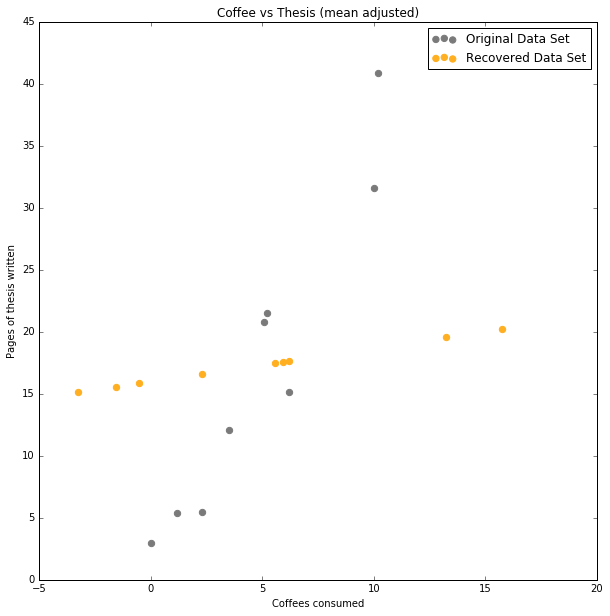

In [15]:
data_recovered = np.linalg.pinv(P).dot(data_transformed.T).T

x_mean, y_mean = np.mean(coffee_v_thesis, axis=0)

# Add the means
data_recovered[:,0] += x_mean
data_recovered[:,1] += y_mean

# Visualising the data
plt.figure(figsize=(10,10))
original_data_fig = plt.scatter(x=coffee_v_thesis[:,0], y=coffee_v_thesis[:,1], color="#7a7a7a", s=40)
recovered_data_fig = plt.scatter(x=data_recovered[:,0], y=data_recovered[:,1], color="#ffaf1f", s=40)
plt.ylabel("Pages of thesis written")
plt.xlabel("Coffees consumed")
plt.title("Coffee vs Thesis (mean adjusted)")
plt.legend([original_data_fig, recovered_data_fig], ["Original Data Set", "Recovered Data Set"])
plt.savefig("recovered_data.jpg", dpi=500)

Note that we have not completely recreated the data set, as we only selected one of the eigenvalues we have lost some of the information describing the data.  You can see that most of the data lines along a diagonal line, it is this line that is represented by the principal component.

In [16]:
#End of notebook